In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'  # for hi-dpi displays
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from numpy import pi, cos, sin

In [2]:
sns.set_style('whitegrid')

## B-DNA Double-Stranded Parameters

In [58]:
r = 1        # (nm) dsDNA radius
δ = 0.34     # (nm) dsDNA base-pair pitch
n = 10.5     # number of bases per turn
Δφ = 2.31    # (radiants) minor-grove angle between the two strands backbones

In [50]:
φ = 2*pi/n  # (radiants) rotation for base-pair

## Dye and Linker Geometry

<img src="figures/DNA1.png" style="width:300px;float:left;">
<img src="figures/DNA2.png" style="width:300px;float:left;">
<img src="figures/DNA3.png" style="width:300px;float:left;">

Fraction for the segment $SH_1$ orver $H_1H_2$:

In [51]:
def dye_position(i, l=1.6, λ=0.5, ψ=0):
    # global structural params: r, δ, n, Δφ
    
    φ = 2*pi/n  # (radiants) rotation for base-pair
    Dx = r * cos(φ*i) + λ*( r*cos(φ*i + Δφ) - r*cos(φ*i) ) + l*cos(ψ)*cos(φ*i + 0.5*Δφ)
    Dy = r * sin(φ*i) + λ*( r*sin(φ*i + Δφ) - r*sin(φ*i) ) + l*cos(ψ)*sin(φ*i + 0.5*Δφ)
    Dz = i*δ + l*sin(ψ)
    return np.array([Dx, Dy, Dz])

In [52]:
def plot_dye(P, axes=None, **kws):
    kws_ = dict(marker='o', ls='-')
    kws_.update(kws)
    if axes is None:
        fig = plt.figure(figsize=(9, 9))
        ax_xy = plt.subplot2grid((2,2), (0,0))
        ax_xz = plt.subplot2grid((2,2), (1,0))
        ax_yz = plt.subplot2grid((2,2), (0,1))
        ax_3d = fig.add_subplot(224, projection='3d')
    else:
        ax_xy, ax_xz, ax_yz, ax_3d = axes

    ax_xy.plot(P[0], P[1], **kws_)
    ax_xz.plot(P[0], P[2], **kws_)
    ax_yz.plot(P[1], P[2], **kws_)
    for ax in (ax_xy, ax_xz):
        ax.set_xlabel('x (nm)')
    ax_xy.set_ylabel('y (nm)')
    ax_xz.set_xlabel('x (nm)')
    ax_xz.set_ylabel('z (nm)')
    ax_yz.set_xlabel('y (nm)')
    ax_yz.set_ylabel('z (nm)')

    ax_3d.plot(P[0], P[1], P[2], **kws_)
    return (ax_xy, ax_xz, ax_yz, ax_3d)

### Donor

In [53]:
λ = 0.5 
ψ = 0
i = 7    # number of bases from reference "base 0"
l = 1.6  # (nm) distance between S and dye position D

In [54]:
dye_position(7)

array([ 1.38564065, -0.8       ,  2.338     ])

In [55]:
bp = np.arange(0, 40)

In [56]:
PD = dye_position(bp)
PA = dye_position(bp, l=1.6, λ=0.5, ψ=pi)

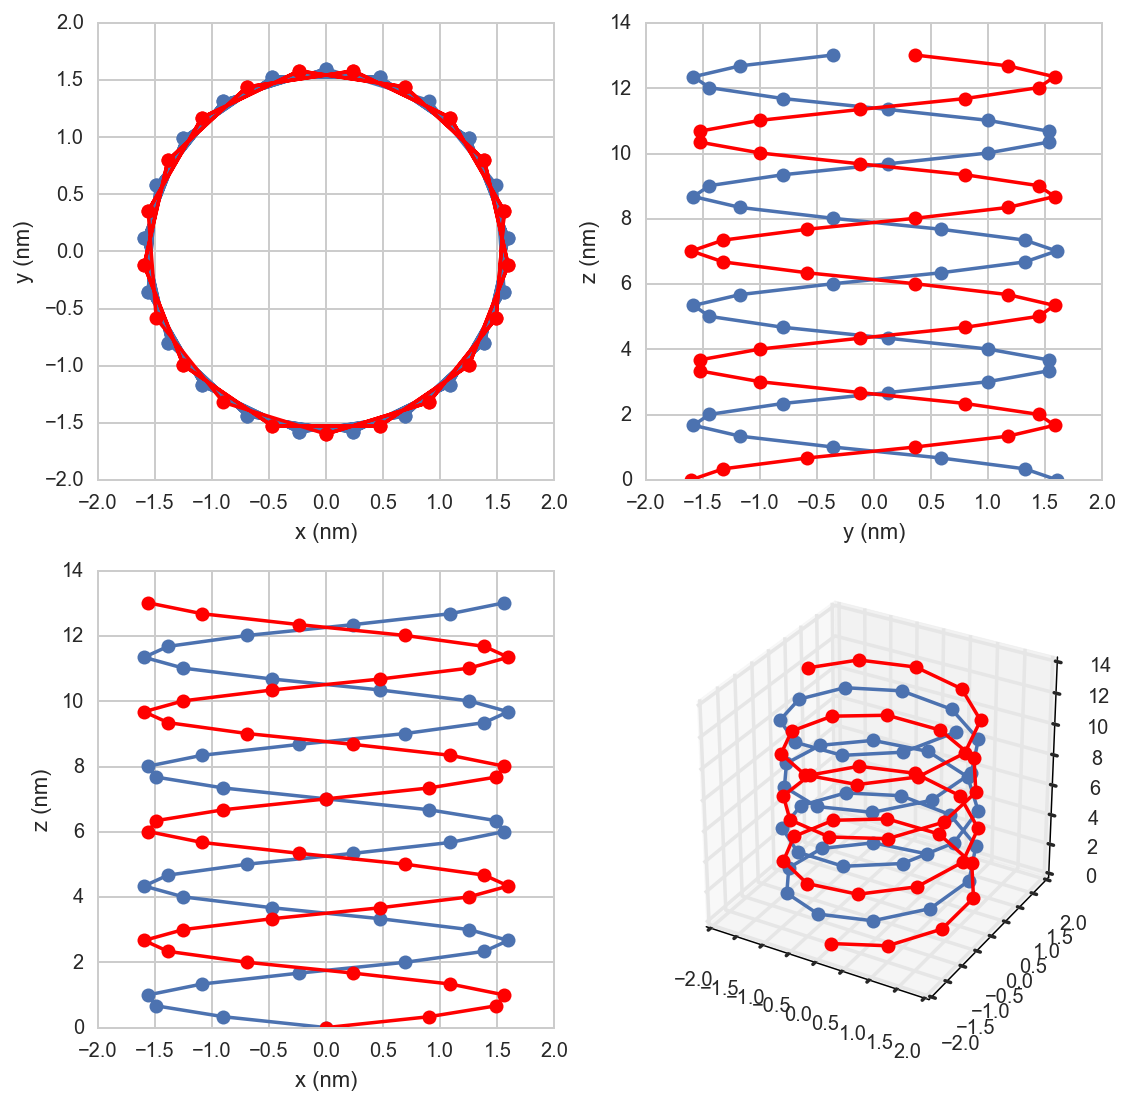

In [57]:
axes = plot_dye(PD)
plot_dye(PA, axes, color='r');

In [109]:
bp = np.arange(0, 40, 0.1)

In [119]:
PD = dye_position(bp, l=1.6, λ=0.2, ψ=0)
PA = dye_position(0, l=1.6, λ=0.8, ψ=-pi/2)

In [126]:
R = np.array([np.linalg.norm(px - PA) for px in PD.T])
#R

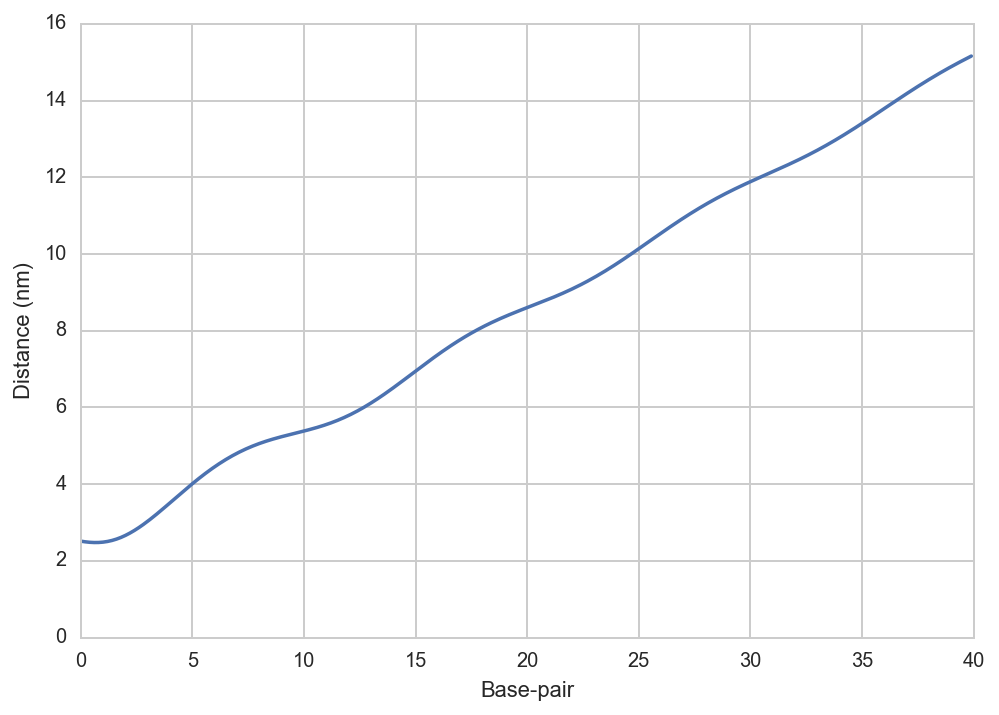

In [127]:
plt.plot(bp, R);
plt.xlabel('Base-pair')
plt.ylabel('Distance (nm)')
plt.ylim(0);

In [128]:
R0 = 6.7  # nm

In [129]:
def fret(R, R0):
    return 1 / (1 + (R/R0)**6)

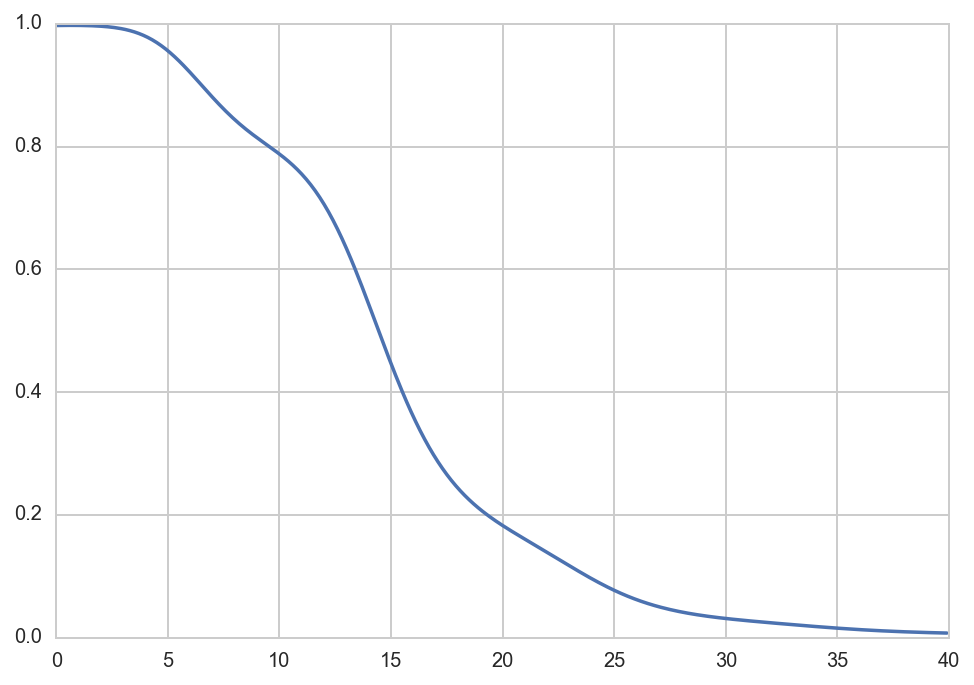

In [131]:
plt.plot(bp, fret(R, R0));